출처: 혼자 공부하는 머신러닝+딥러닝 (박해선) 

데이터 셋 : https://www.kaggle.com/aungpyaeap/fish-market



In [21]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# 도미 데이터

<function matplotlib.pyplot.show>

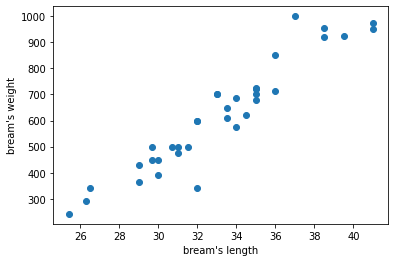

In [4]:
# 도미 길이
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
# 도미 무게
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

plt.scatter(bream_length, bream_weight)
plt.xlabel("bream's length")
plt.ylabel("bream's weight")
plt.show

- 도미의 길이가 길수록 무게가 커지는 경향을 보인다. 도미의 길이와 무게 사이 선형적 관게가 나타난다. 


# 빙어 데이터

<function matplotlib.pyplot.show>

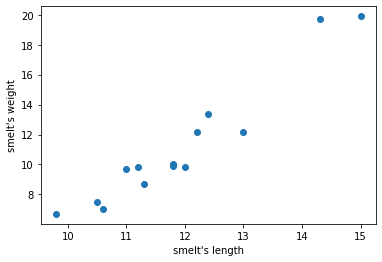

In [8]:
# 빙어 길이
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
# 빙어 무게 
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

plt.scatter(smelt_length, smelt_weight)
plt.xlabel("smelt's length")
plt.ylabel("smelt's weight")
plt.show

- 빙어도 길이가 길수록 무게가 커지는 경향을 보인다. 빙어의 길이와 무게 사이 선형적 관게가 나타난다.

## 도미와 빙어 산점도 한 그래프에 나타내기

<function matplotlib.pyplot.show>

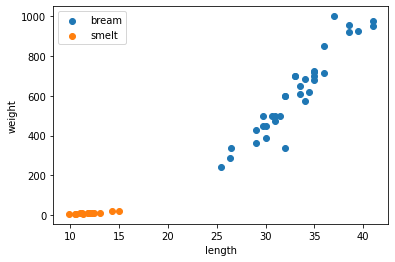

In [12]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.legend(('bream', 'smelt'))
plt.show

- 빙어도 도미와 비슷하게 길이와 무게가 비례하지만 증가하는 정도에서 도미와 차이가 난다. 빙어는 도미에 비해 상대적으로 길이가 늘어나더라도 무게가 많이 늘어나지 않는다. 빙어의 산점도도 선형적이지만 무게가 길이의 영향을 덜 받는다. 

# 도미와 빙어 분류 모델

## 데이터 준비

In [18]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

fish_data = [[l, w] for l, w in zip(length, weight)]
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


* 참고
zip 함수: 나열된 리스트 각각에서 하나씩 원소를 꺼내서 반환한다. 

- 도미는 1, 빙어는 0으로 labeling함. 머신러닝에서는 찾으려는 대상을 1로 놓고, 그 외는 0으로 둔다. 

In [19]:
fish_target = [1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [24]:
# KNeighborsClassifier 객체 생성
kn = KNeighborsClassifier()
# 모델 훈련
kn.fit(fish_data, fish_target)
# 모델의 정확도 계산
kn.score(fish_data, fish_target)


1.0

- 모델의 정확도가 100%이다. 

In [29]:
# 새로운 데이터의 정답 예측
kn.predict([[30, 600]])

array([1])

- 길이가 30, 무게가 600인 데이터를 넣으면 도미(1)라고 예측할 것이다. KNeighborsClassifier는 기본으로 가까운 5개의 데이터를 참고해서 결과를 예측한다. 참고할 데이터의 개수는 n_neighbors = n 을 매개변수로 변경할 수 있다. (예: kn = KNeighborsClassifier(n_neighbors = 49))

<function matplotlib.pyplot.show>

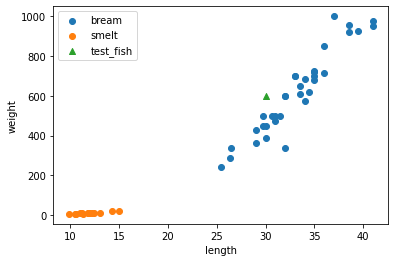

In [28]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker ='^')
plt.xlabel("length")
plt.ylabel("weight")
plt.legend(('bream', 'smelt', 'test_fish'))
plt.show

# 5부터 49까지 n_neighbors 중에서 1.0 아래로 내려가기 시작하는 개수 찾기

- 방법 1

In [32]:
for n in range(5, 50):
  kn.n_neighbors = KNeighborsClassifier(n_neighbors = n)
  kn.n_neighbors.fit(fish_data, fish_target)
  score = kn.n_neighbors.score(fish_data, fish_target)

  if score < 1:
    print(n, score)
    break

18 0.9795918367346939


- 방법 2

In [34]:
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

for n in range(5, 50):
  kn.n_neighbors = n
  score = kn.score(fish_data, fish_target)

  if score < 1:
    print(n, score)
    break

18 0.9795918367346939
